Author: Kiril Klein 

In [2]:
import numpy as np
import importlib
from scipy import stats
import fits, vis  #custom moduls
import as_toolbox as ast
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #Fisher discriminant
from sklearn import metrics
from IPython.display import Image
import sympy as sp
from IPython.core.display import Latex
from sympy import latex
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Distributions and Probabilites 

## Dice 

In [628]:
k, P = np.arange(7, 21), 0
p, N = 1 / 6, 20
for i in k:
    P += stats.binom.pmf(i, N, p)

\begin{itemize}

\item We are running $N=20$ independent trials and have two possible outcomes for each. Success, in case of a 3 with $p_\text{success} = 1/6$ and failure else with $p_\text{failure} = 5/6$. Repeating this experiment many times the distribution of $N_3$ will follow a \textbf{Binomial distribution} $P_\text{binom}(k; p_\text{success} = 1/6, N = 20)\,$ where $k$ denotes the number of successes.

\item Using the binomial distribution we can compute the probability of 7 or more 3's in a roll as follows:
\begin{equation}
\sum_{i=7}^{20} P(i;p_\text{success} = 1/6,N = 20)  = \mathbf{0.0371}\,.
\end{equation}

\end{itemize}

## Covid Test

In [185]:
N_p, N_pp = 103261, 2464
N_pn = N_p - N_pp
N_a, N_ap = 26162, 491
N_an = N_a - N_ap
Npf = N_pp / N_p
Naf = N_ap / N_a
con_table = np.array([[N_pp, N_ap], [N_pn, N_an]])
odds, p_value = stats.fisher_exact(con_table)
#Npf, Naf

In [638]:
FPR, FNR = 0.02e-2, 0.2
N, k = 50e3, 47
a = 1/FPR - 1
b = 1/FNR - 1 
P = N -  (a+1)/(a*b-1)*( b*(N-k)-k  )
P/N
#NP

0.0009252313078269072

\begin{itemize}
\itemThe fraction of positives is $2.39\%$ for PCR and $1.88\%$ for Antigen. After choosing a significance level of $\alpha = 5\%$ a two sided Fisher's exact test is performed on the contingency table shown below.
\end{itemize}

|          | Antigen | PCR    |
|----------|---------|--------|
| Positive | 491     | 2464   |
| Negative | 25671   | 100797 |


It provides a p-value of $\mathbf{5.5\cdot10^{-7}}$ (probability that fractions are the same) which is far below $\alpha\,$. Therefore, the null hypothesis that the fractions are statistically the same can be rejected. 


\begin{itemize}

\item The false negative rate can be estimated 

\end{itemize}

\begin{itemize}

\item To estimate the infected fraction $Pf = \frac{TP + FN}{N}\,$ where $N = 50000\,$, we start with the False positive and false negative rates:
\begin{equation}
    FPR = \frac{FP}{FP + TN}
\end{equation}
\begin{equation}
    FNR = \frac{FN}{FN + TP}
\end{equation}
Let 
\begin{equation}
    a = 1/FPR  -1
\end{equation}
and 

\begin{equation}
    b = 1/FNR  -1
\end{equation}

which allows as to write $FN = TP/b$ and $FP = TN/a\,$.
We know that $FP + TP = k$ and $FN + TN = N-k$ where $k = 47\,$.\
Now we can rewrite:
\begin{equation}
    TN/a + TP = k\,,
\end{equation}
and
\begin{equation}
    TP/b + TN = N-k\,.
\end{equation}

Using these euqations we can solve for $Pf\,$:
\begin{equation}
    Pf = 1 - \frac{a+1}{N(ab-1)}\cdot\big(b(N-k)-k \big)
\end{equation}
Inserting the values gives an infected fraction of $\mathbf{0.093\%}\,$.
\end{itemize}


## Spectrometer 

D:\Master\Blok2\Applied_Statistics\Exam\vis.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


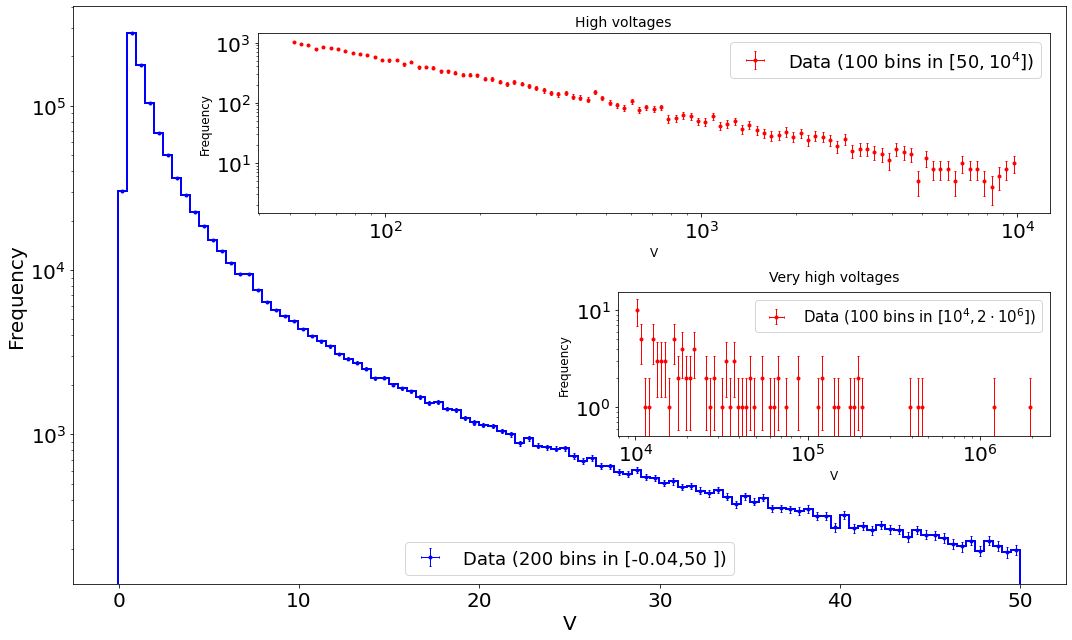

In [207]:
volt = ast.load_url_data("https://www.nbi.dk/~petersen/data_VoltagePeaks.txt")
x, y, sy, binwidth, fig, ax = vis.nice_histogram(
    volt,100, show_plot=False, x_range= (-0.04,50), 
    ylog_scale = True,xlog_scale = False, xlabel = 'V', figsize = (15,9), legend_loc = 8, 
    data_label='Data (200 bins in [-0.04,50 ])', plot_hist = True, color_hist = 'b')
inset_bbox = [.98,.95,11,2.5]
axins = inset_axes(
    ax, width = inset_bbox[2], height = inset_bbox[3], bbox_to_anchor =inset_bbox[:2],
    bbox_transform=ax.figure.transFigure)
inset_bbox2 = [.98,.55,6,2]
axins2 = inset_axes(
    ax, width = inset_bbox2[2], height = inset_bbox2[3], bbox_to_anchor =inset_bbox2[:2],
    bbox_transform=ax.figure.transFigure)
axins.text(0.40, 1.1, "High voltages", transform=axins.transAxes, fontsize=14, verticalalignment='top')
axins2.text(0.5, 1.15, "Very high voltages", transform=axins2.transAxes, fontsize=14, verticalalignment='top', 
            horizontalalignment = 'center')


_,_,_,_,fig,ax = vis.nice_histogram(volt,100, show_plot=True, x_range= (50,10000), xlog_scale = True,
                                    ylog_scale = True, xlabel = 'V', axis = axins, 
                                    figure = fig, plot_legend = True, ecolor='r', fmt ='.r', 
                                    label_fs=12, data_label='Data (100 bins in ' +r'$[50, 10^4])$', 
                                   color_hist= 'r')
_,_,_,_,fig,ax = vis.nice_histogram(volt,100, show_plot=True, x_range= (10000,2e6), xlog_scale = True,
                                    ylog_scale = True, xlabel = 'V', axis = axins2, 
                                    figure = fig, plot_legend = True, ecolor='r', fmt ='.r', 
                                    label_fs=12, data_label='Data (100 bins in ' + r'$[10^4, 2\cdot10^6])$', legend_fs = 15,
                                    save = True, figname = 'img/voltages.png', dpi = 150,  color_hist = 'r')
#If there is time left at the end produce histogram for high values, therefore change the function
display(fig)

In [688]:
x_range = (.1,10)
x, y, sy, binwidth = fits.produce_hist_values(volt, x_range = x_range, N_bins = 100)
def expon(x, N, lam): return lam*N*binwidth*stats.expon.pdf(x,scale= 1/lam)
def gamma(x, N,a, sig): return N*binwidth*stats.gamma.pdf(x,a, scale = sig )
p0 = [5e6,5,.4]
#x, y, sy, binwidth, fig, ax = vis.nice_histogram(volt, 100, x_range = x_range, show_plot = False)
#x_lin = np.linspace(x_range[0], x_range[1],100)
#y_lin = gamma(x_lin, *p0)
#ax.plot(x_lin, y_lin)
#display(fig)
_, _, popt, pcov =fits.chi2_fit_func(x,y, sy, gamma, p0, show_plot = False,
                                       figure = fig, xlabel = 'V', legend_off = True, Text_pos=[0,.99], ylabel = 'Frequency',
                                       save_plot = False,text_fs = 12)

In [687]:
x, y, sy, binwidth, fig, ax = vis.nice_histogram(
    volt,50, show_plot= False, x_range= (50,90), 
    ylog_scale = False,xlog_scale = False, xlabel = 'V', figsize = (15,9), legend_loc = 8, 
    data_label='Data (200 bins in [-0.04,50 ])', plot_hist = False, color_hist = 'b')

In [684]:
mu_peak = [2.95, 7.45, 11.95]
range1 = (2.92, 2.98)
N_bins1 = 50
x1, y1, sy1, binwidth1 = fits.produce_hist_values(volt, x_range = range1, N_bins = 50)
def gauss1(x,N0, N,mu, sig): return N0 + N*binwidth1*stats.norm.pdf(x, mu,sig)
range2 = (7.4, 7.5)
x2, y2, sy2, binwidth2 = fits.produce_hist_values(volt, x_range = range2, N_bins = 50)
def double_gauss_one_mean(x, N0,N, f, mu, sig1, sig2):
    return N0 + binwidth2*N*(f*stats.norm.pdf(x,mu,sig1)+(1-f)*stats.norm.pdf(x,mu,sig2))
range3 = (11.9, 12)
x3, y3, sy3, binwidth3 = fits.produce_hist_values(volt, x_range = range3, N_bins = 50)

def gauss3(x,N0, N,mu, sig): return N0 + N*binwidth3*stats.norm.pdf(x, mu,sig)


fig, ax = plt.subplots(3,1,figsize = (15,11))
plt.close(fig)
ax0, _, popt, pcov =fits.chi2_fit_func(x1,y1,sy1, gauss1, [125, 150, 2.95, 0.01], show_plot = False, axis = ax[0],
                                       figure = fig, xlabel = 'V', legend_off = False, Text_pos=[0,.99], ylabel = 'Frequency',
                                       save_plot = False,text_fs = 12, 
                                     fit_label = 'chi2 Gauss fit', data_label = 'Data with poisson errors',
                                    legend_loc = 'upper right', legend_fs = 16)
#ax0.set_ylim(50,220)
_, _, popt, pcov =fits.chi2_fit_func(x2,y2,sy2, double_gauss_one_mean, [100, 200, .8,7.45, 0.02, 0.01], show_plot = False, axis = ax[1],
                                       figure = fig, xlabel = 'V', legend_off = False, Text_pos=[0,.99], ylabel = 'Frequency',
                                       save_plot = True, figname = 'img/peaks.png', text_fs = 12,
                                     fit_label = 'double Gauss', data_label = '', legend_loc = 'upper right', legend_fs = 16)
_, _, popt, pcov =fits.chi2_fit_func(x3,y3,sy3, gauss3, [20, 25, 11.95,0.01], show_plot = False, axis = ax[2],
                                       figure = fig, xlabel = 'V', legend_off = False, Text_pos=[0,.99], ylabel = 'Frequency',
                                       save_plot = True, figname = 'img/peaks.png', text_fs = 11,
                                    fit_label = 'chi2 Gauss fit', data_label = '', legend_loc = 'upper right', legend_fs = 16)

#display(fig)

In [690]:
#search for peaks
x, y, sy, binwidth, fig, ax = vis.nice_histogram(
    volt,100, show_plot=False, x_range= (11.8,12.1), 
    ylog_scale = False,xlog_scale = False, xlabel = 'V', figsize = (15,9), legend_loc = 8, 
    data_label='Data (200 bins in [-0.04,50 ])', plot_hist = False, color_hist = 'b')

\begin{itemize}
    \item All the data is shown in the plot below. For errors, Poisson distributed counts were assumed.
\end{itemize}

\begin{figure} [H]
    \centering
    \includegraphics[width = 12cm]{img/voltages.png}
    \caption{}
    \label{fig:MC_t}
\end{figure}

In [694]:
s1 = 1243.749/86.71
s2 = 1055.303/93.222
s3 = 124.892/20.527
#s1,s2,s3

\begin{itemize}

\item Three peaks could (see below). For every peak a $\chi^2$ fit was performed resulting in reasonable p-values. The significance $s = N_{sig} / \sigma(N_{sig})$ for the fitted peaks is :
$s1 = 1243.749/86.71 = 14.3\,$, $s2 =1055.303/93.222=  11.3\,$ and $s3 = 124.892/20.527= 6.1\,$.
All three peaks are therefore very certain. To confirm this an unbinned log likelihood (ullh) with suitable function can be fitted to the background (H0) without the peaks and compared to the ullh fit of background with signal (H1). We can then compute the ration $D = -2 log(LLH_{H0} / LLH_{H1}$ to evaluate the significance of the peaks.
\end{itemize}
![title](img/peaks.png)

# Error propagation 


## Error prop 

In [696]:
mu_x, s_x = 1.96, 0.03
def fy(x): return 1/(1+x**2)
def fz(x): return 1/(1-x)**2
symbols_y = ['fy','x']
symbols_z = ['fz','x']
eq_fy, eq_sfy, sfy_lamb =  ast.propagate_error(fy, symbols_y)
eq_fz, eq_sfz, sfz_lamb = ast.propagate_error(fz, symbols_z)
#print(latex(eq_sfy)), print(latex(eq_sfz))
#ast.round_result(fy(mu_x), float(sfy_lamb(mu_x,s_x)))
#ast.round_result(fz(mu_x), float(sfz_lamb(mu_x,s_x)))

In [697]:
mu_x2, s_x2 = 0.96, 0.03
#print(fy(mu_x2))
#ast.round_result(fy(mu_x2), float(sfy_lamb(mu_x2,s_x2)))
#ast.round_result(fz(mu_x2), float(sfz_lamb(mu_x2,s_x2)))

\begin{itemize}

\item Performing error propagation on these formulas gives:
\begin{equation}
    \sigma_{y} = 2 \sqrt{\frac{\sigma_{x}^{2} x^{2}}{\left(x^{2} + 1\right)^{4}}}
\end{equation}
and
\begin{equation}
    \sigma_{z} = 2 \sqrt{\frac{\sigma_{x}^{2}}{\left(1 - x\right)^{6}}}
\end{equation}
Inserting the provided values in the formulas above results in $\mathbf{y = (207\pm5)\cdot10^{-3}}$ and $\mathbf{z = (109\pm7)\cdot10^{-2}}\,$.

\item If $x = 0.96\pm 0.03$ instead, then we get
    $\mathbf{y = (52.0\pm1.6)\cdot10^{-2}}$ and $\mathbf{z = (6\pm9)\cdot10^{2}}\,$.

\end{itemize}

## Gravitational Acceleration 

In [3]:
mu_g = np.array([9.54, 9.36, 10.02, 9.87, 9.98, 9.86, 9.86, 9.81, 9.79])
s_g = np.array([0.15, 0.10, 0.11, 0.08, 0.14, 0.06, 0.03, 0.13, 0.04])
wa_g, swa_g = ast.weighted_avg(mu_g, s_g)
#print(wa_g, swa_g)
z = np.abs(mu_g-wa_g)/s_g
#ast.std_to_prob(z)*len(mu_g)

In [8]:
chi2 = ast.chi_sq_const(mu_g, s_g)
p = stats.chi2.sf(len(mu_g), chi2)
#print(p, chi2)
#len(mu_g)*ast.std_to_prob(z)

In [11]:
#excluding the outlier:
wa_g_best, swa_g_best = ast.weighted_avg(np.delete(mu_g,1), np.delete(s_g,1))
print(wa_g, swa_g)

9.824097473177615 0.01997038603519878


In [10]:
#two sample test
z = ast.two_sample_test(wa_g_best, 9.8158, swa_g_best, 0.0001)

In [713]:
#vis.nice_histogram(mu_g, 10, show_plot = True)

\begin{itemize}
 
\item Computing the weighted average and its uncertainty one gets: $g = (9.824\pm 0.020)\,\mathrm{m/s^2}\,$. To find out what the best estimate of $g$ is, the z-value is computed for each measurement which is used to compute the corresponding probability. The second measurement $g_\text{outlier}  = (9.36\pm0.10)\,\mathrm{m/s^2}$ has a too low global probability of $p_\text{glob} = 3.11\cdot 10^{-5} < 0.01\,$. After excluding this measurement the weighted average does not change. The resulting value for the best estimate is  $\mathbf{g_\text{best}  = (9.824\pm 0.020)\,\mathrm{m/s^2}}\,$.


\item One gets $\mathbf{\chi^2  = 32.396}$ which gives a p-value of $\mathbf{\text{sf}(\text{ndof} = 9, \chi^2 )  = 0.99998 }\,$. The high p-value indicates an overestimation of uncertainties. The only unlikely measurement only $g_\text{outlier}$ is shown above. The second least likely measurement $g = (9.54\pm0.15)\,\mathrm{m/s^2}$ has a $p_\text{glob}$ of $0.52$ which is high enough.

\item Running the two sample test for the best estimate $\mathbf{g_\text{best}}$ with the precision measurement gives a z-value of $0.176\,$ they therefore do agree with each other.

\end{itemize}

# Monte Carlo 

## Sum of exponentiall distributed numbers 

In [14]:
N_exp, tau = 1000, 0.8
N_sum  = 4
u = np.empty(N_exp)
for i in range(N_exp):
    t = tau*stats.expon.rvs(size = N_sum, scale =1/tau )
    u[i] = np.sum(t)
def gauss_cdf(x): return stats.norm.cdf(x, loc = N_exp/tau, scale = np.sqrt(N_exp)/tau)
#print(stats.kstest(u, gauss_cdf,N = N_exp))
#try the KS test later

In [43]:
def gauss(x, N,mu, sig): return N*stats.norm.pdf(x, mu,sig)
def gamma(x, N, k, theta): return N*binwidth*stats.gamma.pdf(x,k, scale = theta )
def skew_norm(x, N, a, mu, sigma): return N * stats.skewnorm.pdf(x, a, mu, sigma)
N_bins = 50
_, _, _, binwidth = fits.produce_hist_values(u, N_bins)

p0_gauss = [1000,3,1]
minuit_obj, x, y, sy = fits.hist_fit(gauss, u, p0_gauss, N_bins= N_bins, x_range = None, fit_type = 'chi2',
             observed = True, print_level = 0)
chi2_gauss = minuit_obj.fval
p_gauss = stats.chi2.sf(chi2_gauss, len(sy)- 3)
x_axis = np.linspace(u.min(), u.max(), 200)
y_axis = gauss(x_axis, *minuit_obj.args)#*binwidth

fig, ax  = plt.subplots(figsize = (14,7))
ax.plot(x_axis, y_axis, label = 'Gaussian chi2 fit', color = 'orange')
x, y, sy, binwidth, fig, ax = vis.nice_histogram(u, N_bins, show_plot = False, axis = ax, figure = 
                        fig, xlabel = 'u',data_label='Distribution of u')



p0_gamma = [1200, 3, 1.5]
p0_sn = [1000, 1, 3,1]
Functions = [gamma, skew_norm]
Ranges = [[u.min(), u.max()],[u.min(), u.max()]]
P0 = [p0_gamma, p0_sn]

_ = fits.chi2_fit_mult_func(x[y>0],y[y>0],sy[y>0],Functions, P0, Ranges, show_plot = False, axis = ax,
                                       figure = fig, xlabel = 'u', legend_off = False,data_label=None,
                                        Text_pos=[[.4,.99],[.65,.5]], ylabel = 'Frequency',
                                   Fit_label = ['Gamma chi2 fit' ,'Skew norm chi2 fit'],
                                       save_plot = True, figname = 'img/MC_u.png', text_fs = 16, dpi = 120, figsize = (14,15))
#display(fig)

\begin{itemize}

\item A plot of the generated data is shown below
![title](img/MC_u.png)

\end{itemize}



\begin{itemize}

\item A $\chi^2$ fit of a Gaussian doesnt match the data well. It gives a p-value of $0.2\%$ and can therefore be rejected. One can also try to test it with a 
Kolmogorov-Smirnov test and see if the central limit theorem applies which would predict a Gaussian distribution with  
\begin{equation}
    \mu = \sum_{i=1}^4 \mu_i = 4/\tau
\end{equation}
and
\begin{equation}
    \sigma = \sqrt{\sum_i \sigma_i^2} = 2/\tau \,.
\end{equation}


\item $\chi^2$ fits of a gamma and a skewed-normal pdf were performed, both resulting in reasonable p-values. The distribution could be best matched with a gamma function. 

\end{itemize}

## Determine Median 

In [74]:
def f(x): return x*np.exp(-x)
#print(f(20))
#Monte Carlo
num_it = 1000000
random = []
ri = 0.001
N_acc = 0
N = 1000
for i in range(num_it):
    rand_num = np.random.uniform(0, 20)
    rp = np.copy(ri)
    rp = rand_num
    if rp<0:
        r = ri
    else:
        p_acc = f(rp)/f(ri)
        prob = np.random.uniform(0,1)
        if p_acc>prob:
            r = rp
            random.append(r)
            N_acc +=1
        else:
            r = ri
    ri = np.copy(r)
#N_acc/num_it

In [84]:
gen_random = np.array(random[-N:])
med = np.median(gen_random)
print(np.median(gen_random))
x, y, sy, binwidth, fig, ax = vis.nice_histogram(gen_random, 60, show_plot = False, data_label= 'Data with Poisson errros')
def f_pdf(x): return N*binwidth*f(x)
x_ax = np.linspace(0,15,300)
ax.plot(x_ax,f_pdf(x_ax), label = r'$f(x) = x\exp{(-x)}$', color = 'orange')
ax.axvline(med, color = 'green', label = 'Median')
ax.legend(fontsize = 22)
fig.tight_layout()
fig.savefig('img/MC_median.png', dpi = 150)
#display(fig)# RUN KS

2.0663819991546095


First we want to determine C in order to $f(x) = Cx\exp{-x}$ to be normalized:
\begin{equation}
    \int_{0}^{\infty}dx'\;C\cdot  f(x') =1\,.
\end{equation}
Solving for the constant gives $C = 1 \,$.\
The integral $F(x) = \int_{-\infty}^xdx'f(x')$ gives $1-(x+1)\exp{(-x)}\,$. This function is not bijective in the given range and can thus not be inverted which makes the transformation method unsuitable. The accept reject method cannot be used either because the range is not bounded. 

To produce values distributed according to $f(x)$ we want thus first to find a pdf $g(x)$ with the following properties:
\begin{itemize}
    \item $G(x) = \int_{-\infty}^xdx'g(x')$ is invertible
    \item $g(x)\geq f(x)$ in the whole range
\end{itemize}
The pdf $f(x)$ has a maximum at $x = 1$ with $f(1) = 1/e\,$/. Such a pdf could not be found.
Therefore, a Monte Carlo method called the Metropolis algorithm is chosen to generate the values. 
It was implemented as follows:
\begin{itemize}
    \item Starting point $x0 = 0.01$
    \item Draw a random point $x_\text{new}$ from the uniform distribution between 0 and 20 (The bound was chosen since f(20) is negligibly small)
    \item Compute $\text{frac} =  f(x_\text{new})/f(x)$
    \item Accept new point with probability $p_\text{acc} = \text{min}(\text{frac}, 1)$
    \item Take The last 1000 simulated points
\end{itemize}
The algorithm gives an acceptance rate of 0.18. The resulting points along the pdf can be seen in the plot below.

![title](img/MC_median.png)

The median of the generated values was determined to be $\mathbf{2.07\,}$.

# Statistical tests

## Covid Vaccine 

In [88]:
N_p, N_pp  = 21728, 162
N_v, N_pv = 21720, 8
N_nv = N_v-N_pv
N_np = N_p- N_pp
con_table = np.array([[8, 162],[21712, 21566]])
odds, p_value = stats.fisher_exact(con_table)
#odds, p_value

In [105]:
eps = (162-8)/162
#eps

In [107]:
N_pl = stats.poisson.rvs(162, size = 100000)
N_vac = stats.poisson.rvs(8, size = 100000)
eps = (N_pl-N_vac)/N_pl
Mean = np.mean(eps)
_, _, _, _, fig, ax = vis.nice_histogram(eps, 50, figsize = (12,6), show_plot = False, data_label = 'Simulated efficacy with errors')
ax.axvline(0.932, color = 'r', label = 'Boundaries of the 68% CI')
ax.axvline(0.968, color = 'r')
ax.legend(fontsize = 20)
fig.tight_layout()
fig.savefig('img/ST_efficacy.png', dpi = 150)
#display(fig)
#lets use symmetric intervals
Interval = np.linspace(0.01, .1, 300)
prop = []
for interval in Interval:
    mask = (eps>(Mean-interval)) & (eps<(Mean+interval)) 
    eps_ma = eps[mask]
    prop.append(len(eps_ma)/len(eps))
prop = np.array(prop)

In [108]:
fig, ax = plt.subplots()
ax.plot(Interval, prop)
#plt.show()
plt.close()
idx = (np.abs(prop - 0.68)).argmin()
CI = Interval[idx]
CI_min = Mean-CI
CI_max = Mean +CI
#CI_min, CI_max

In [109]:
con_table = np.array([[1, 9],[21719, 21719]])
odds, p_value = stats.fisher_exact(con_table)
#odds, p_value

\begin{itemize}

\item Here, the contingency table shown below can be used to perform the Fisher's exact test and determine the probability that the vaccine has no effect. 

\end{itemize}


|          | Vaccine  | Placebo |
|----------|---------|-------- |
| Positive | 8       |  162    |
| Negative | 21712   |   21566 |


The resulting p-value is $\mathbf{1.6\cdot10^{-38}}$ and therefore one can reject the hypothesis of the vaccine having no effect.

\begin{itemize}

\item Considering the low probability of being tested positive and the high numbers of candidates, the number of positive cases follow Poisson distributions with $\lambda_\text{vac} = 8$ for vaccinated subjects and $\lambda_\text{plac} = 162$ for subjects that were given a placebo. Since it is difficult to calculate the distribution of a ratio of two Poisson distributed numbers, we can either use a Gaussian approximation which is reasonable for $N_\text{placebo}$ but critical for $N_\text{vaccine}\,$ or simulate the efficacy. 
Here, the efficacy is simulated using the generator of Poisson distributed numbers and is shown below. 
Using the data, one can simulate the fraction of points falling within the confidence interval for different boundaries. The boundaries were chosen symmetric around the mean of $0.950\,$. The resulting $68\%$ confidence interval is $\mathbf{[0.932, 0.968]}\,$.
![title](img/ST_efficacy.png)

\end{itemize}

\begin{itemize}

\item The contingency table for severe cases is shown below:
\end{itemize}

|          | Vaccine  | Placebo |
|----------|---------|--------  |
| Severe   | 1       |  9       |
| non severe|   21719 |   21719  |


Performing a fisher's exact test gives a p-value of $\mathbf{2.15\%}$ which is below the chosen significance level $\alpha\,$. The null hypothesis that the vaccine has no effect on severe cases can therefore be \textbf{rejected}.



## Cards 

In [111]:
import pandas as pd
import urllib
file= urllib.request.urlopen('https://www.nbi.dk/~petersen/data_ShuffledCards.txt')
data = pd.read_csv(file, delimiter=r"\s+",skiprows =  lambda x: x in [0,1], header = None)
data = np.array(data)
data = data[:,[1,3,4,5]]

In [113]:
p = 4/52
p_34 = stats.binom.pmf(3, 4,p )+ stats.binom.pmf(4, 4,p )
#p_34*100

In [114]:
P = 4/52*3/51 * 2/50* 1/49 + 4/52* 48/51 * 3/50* 2/49 +4/52* 48/51* 3/50* 2/40 + 48/52* 4/51* 3/50* 2/49 
#P*100

In [116]:
#ast.runsTest(data[:,2]), ast.runsTest(data[:,3])

In [137]:
chi2_prob, fig, ax = ast.seq_freq_test(data[:,3], seq_l = 3, N_bins = 5, show_plot = False)
ax.set_xlabel('Sequence Number', fontsize = 20)
ax.set_ylabel('Frequency',fontsize = 20)
ax.set_yscale('log')
ax.tick_params(axis = 'both', labelsize = 20)
#display(fig)
ax.legend(fontsize = 20, loc = 8)
fig.tight_layout()
#display(fig)
fig.savefig('img/ST_sequence.png', dpi = 120)

\begin{itemize}

\item The number of aces follows a binomial distribuition. Drawing the cards is independent with a probability of success            $p_\text{success} =4/52\,$. 
 The probability of getting   3 or more aces can be computed as follows:
   \begin{equation}
       P(\text{3 aces out of 4 cards}) = P_\text{bin} (3;p_\text{success},N = 4) + P_\text{bin} (4;p_\text{success},N = 4) = 0.17\% \,.
    \end{equation}
    
\item To compute this a tree diagramm is drawn with the corresponding probabilities. To get the result we some over all branches that we are interested in:
   \begin{equation}
    P = 4/52\cdot 3/51 \cdot 2/50\cdot 1/49 + 4/52\cdot 48/51 \cdot 3/50\cdot 2/49 +4/52\cdot 48/51\cdot 3/50\cdot 2/40 + 48/52\cdot 4/51\cdot 3/50\cdot 2/49 = 0.058\%\,.
   \end{equation}
\item Again, choosing a significance level of $\alpha = 5\%$ a runs test is performed on the values giving a p-value of $17.2\%$ and on the suit resulting in a p-value of $77.94\%$ indicating that the deck is well shuffled. Testing for sequences of length 3 results in a low p-value of $5.2\%$ which is suspicous but still acceptable with the chosen $\alpha\,$. A histogram of the sequences reveals that some occur mor often than expected, see figure below.

![title](img/ST_sequence.png)

\end{itemize}

# Fitting data

## Solar power capacity 

In [150]:
data = ast.load_url_data('https://www.nbi.dk/~petersen/data_SolarPower.txt', skiprows = 2)
year = data[:,0]
CC = data[:,1]
PVC = data[:,2]
SPVC = PVC*0.15
#fig, ax = plt.subplots()
#ax.plot(CC, PVC)

In [151]:
def fpl(x, a, b): return a*x**(-b)
def fC(P, a, b): return (P/a)**(-1/b)
ax, fig, Popt, Pcov = fits.chi2_fit_func(CC, PVC, SPVC, fpl, p0 = [200,4], legend_loc=5, Text_pos = [.6,.99], figsize = (13,6),
                      ylogscale= True, xlabel = 'Cumulative solar power [MW]', ylabel = 'SPV module cost [USD/W]',
                                        show_plot = False, show_CI = False, data_label = 'Data with uncertainty',
                                        fit_label=r'$\chi^2$'+' fit of '+ r'$f(x) = ax^{-b}$', text_fs=20,
                                        legend_fs=20, figname = 'img/fitting_1', save_plot = True, dpi = 120)

#display(fig)
#error propagation on P(C)
symbols = ['P', 'C','a', 'b']
eq, seq, s_lam = ast.propagate_error(fpl, symbols)
va, vb = Popt[0], Popt[1]
vsa, vsb = np.sqrt(Pcov[0,0]), np.sqrt(Pcov[1,1]) 
#display(eq), print(latex(seq)), fpl(1e6, va, vb), s_lam(1e6,va,vb,vsa,vsb,0)
#ast.round_result(fpl(1e6, va, vb), float(s_lam(1e6,va,vb,vsa,vsb,0)))

In [155]:
#propagate error on capacity
symbols = ['C', 'P','a', 'b']
eq, seq, s_lam = ast.propagate_error(fC, symbols)
va, vb = Popt[0], Popt[1]
vsa, vsb = np.sqrt(Pcov[0,0]), np.sqrt(Pcov[1,1]) 
#display(eq), print(latex(seq))
sigma_CC = np.empty(len(PVC))
for i in range(len(PVC)):
    sigma_CC[i] = s_lam(PVC[i], va, vb,SPVC[i], vsa, vsb)

In [157]:
#fig, ax = plt.subplots()
x = np.linspace(1976,2020,100)
y = expon(x, 1,.31)
#ax.errorbar(year, CC, sigma_CC, fmt = '.b')
#ax.plot(x,y)

In [158]:
def expon(x, p,l): return p*np.exp(l*(x-1976))

ax, fig, Popt, Pcov = fits.chi2_fit_func(year, CC, sigma_CC, expon,p0 = [0.57,.32 ], legend_loc=2,
                                         Text_pos = [.1,.8],text_fs = 18, figsize = (12,6),
                      ylogscale= True, xlabel = 'year', ylabel = 'Cumulative solar power [MW]',
                                        show_plot = False, show_CI = True, data_label = 'Data with uncertainty',
                                        fit_label=r'$\chi^2$'+' fit of '+ r'$f(x) = p\cdot\exp{(l(x-1976))}$')
year_extend = np.linspace(2019, 2021,100)
C_pred = expon(year_extend, *Popt )
sigma_ab = np.sqrt(np.diagonal(Pcov))
best_fit_ab = Popt
bound_upper = expon(year_extend, *(best_fit_ab + sigma_ab))
bound_lower = expon(year_extend, *(best_fit_ab - sigma_ab))
            # plotting the confidence intervals
ax.fill_between(year_extend, bound_lower, bound_upper,
                        color = 'k', alpha = 0.15)
ax.plot(year_extend, C_pred, color = 'r')
ax.axhline(1e6, color = 'green', label = '1 million MW')
ax.legend(fontsize = 20)
fig.tight_layout()
fig.savefig('img/fitting_2.png', dpi = 120)
#display(fig)

In [160]:
def func(p,l): return 1/l*sp.log(1e6/p)+1976
symbols = ['x', 'p','l']
eq, seq, s_lam = ast.propagate_error(func, symbols)
vp, vl = Popt[0], Popt[1]
vsp, vsl = np.sqrt(Pcov[0,0]), np.sqrt(Pcov[1,1]) 
#display(eq), print(latex(seq))
#s_lam(vp,vl,vsp,vsl), func(Popt[0], Popt[1])

\begin{itemize}

\item The price of solar power in dependence on the cumulative solar power capacity is shown below 
![title](img/fitting_1.png)

\item The fit results in a low p-value and is therefore unlikely. However, we use the function to estimate the errors on the cumulative solar power (C). 

\item The cumulative solar power capacity as a function of the year is shown below
![title](img/fitting_2.png)

Let P be the price on solar power and C be the cumulative solar power capacity. We assume a relation 
\begin{equation}
P(C) = aC^{-b}
\end{equation}
Inverting results in:
\begin{equation}
    C(P) = (P/a)^{(-1/b)}
\end{equation}
Applying the error propagation and neglecting the covariances gives then:
\begin{equation}
\sigma_{C} = 1/b\cdot\sqrt{\frac{\sigma_{b}^{2} \left(\frac{P}{a}\right)^{- \frac{2}{b}} \ln{\left(\frac{P}{a} \right)}^{2}}{b^{2}} + \frac{\sigma_{a}^{2} \left(\frac{P}{a}\right)^{- \frac{2}{b}}}{a^{2} } + \frac{\sigma_{P}^{2} \left(\frac{P}{a}\right)^{- \frac{2}{b}}}{P^{2} }}
\end{equation}
Using this error estimation one can perform a $\chi^2$ fit on the relation between the year and the cumulative solar power, which is shown above. The fit results in a low p-value and is therefore not a very good description for the data. To determine when C is expected to reach 1 million MW one can use the fitted parameters and solving:
\begin{equation}
    10^6 = p\cdot\exp{(l(x-1976))}
\end{equation}
 for x which results in:
 \begin{equation}
     x = 1/l\ln{(10^6/p)}+1976 
 \end{equation}
 Error propagation gives then:
     \begin{equation}
     \sigma_{x} = \sqrt{\frac{\sigma_{p}^{2}}{l^{2} p^{2}} + \frac{\sigma_{l}^{2} \ln{\left(\frac{10^6}{p} \right)}^{2}}{l^{4}}}
     \end{equation}
 
 Therefore, this capacity will be reached in the year $2020.5\pm1.0\,$, it is also indicated in the plot.\
 We can estimate the price at that time by using the relation $P(C)\,$. The error propagation on that gives:
 \begin{equation}
 \sigma_{P} = \sqrt{C^{- 2 b} a^{2} \sigma_{b}^{2} \log{\left(C \right)}^{2} + C^{- 2 b} \sigma_{a}^{2} + \frac{C^{- 2 b} a^{2} b^{2} \sigma_{C}^{2}}{C^{2}}}
 \end{equation}
 The estimated price when the capacity of $10^6$ MW is reached is $C = (0.37547 \pm 0.00003)\,\mathrm{USD}\,$.
 
\end{itemize}

## Covid, again

In [198]:
data = ast.load_url_data('https://www.nbi.dk/~petersen/data_Covid19tests.txt', skiprows = 2)
day = data[:,0]
T = data[:,1]
P = data[:,2]
muT = np.mean(T)
smuT = np.std(T)/np.sqrt(len(T))
#muT, smuT

In [199]:
#scaled positives
SP = P*(T/muT)**.7
tG = 4.7
def f_SP(t, SP0, R, t0): return SP0*R**((t-t0)/tG)
#fig,ax = plt.subplots()
#ax.plot(day, SP)
x = np.linspace(4,20,100)
#ax.plot(x, f_SP(x, 2900,.4,5))

In [200]:
symbols = ['SP', 'P', 'T','muT']
def f(P,T, muT): return P*(T/muT)**.7
eq, seq, s_lam = ast.propagate_error(f, symbols) 
#display(eq), print(latex(seq))
sigma_SP = np.empty(len(P))
for i in range(len(P)):
    sigma_SP[i] = s_lam(P[i],T[i],muT,0,0, smuT)

In [201]:
sigma_SP_sys = 0
_ = fits.chi2_fit_func(day, SP, np.sqrt(sigma_SP**2+sigma_SP_sys**2), f_SP, [2900,.4,5], legend_loc = 7, Text_pos = [.6,.99], figsize = (13,8), 
                  xlabel = 't [day]', ylabel = 'SP', data_label = 'Data with uncertainties', 
                   fit_label= r'$\chi^2$'+' fit of '+ r'$SP(t) = SP_0\cdot R^{((t-t_0)/t_G)}$', save_plot = True,
                      figname = 'img/fitting_cov1.png', dpi = 120, show_plot = False)

In [202]:
sigma_SP_sys = 260
_ = fits.chi2_fit_func(day, SP, np.sqrt(sigma_SP**2+sigma_SP_sys**2), f_SP, [2900,.4,5], legend_loc = 1, Text_pos = [.5,.7], figsize = (13,8), 
                  xlabel = 't [day]', ylabel = 'SP', data_label = 'Data statistical and systematic error', 
                   fit_label= r'$\chi^2$'+' fit of '+ r'$SP(t) = SP_0\cdot R^{((t-t_0)/t_G)}$', save_plot = True,
                      figname = 'img/fitting_cov2.png', dpi = 120, legend_fs=19, text_fs = 18, show_plot = False)

In [203]:
#Uncertainty on R
from ExternalFunctions import Chi2Regression
from iminuit import Minuit
sigma_SP_sys = 0
def f_SP(t, SP0, R, t0, tG): return SP0*R**((t-t0)/tG)
fit_object = Chi2Regression(f_SP, day, SP, np.sqrt(sigma_SP**2+sigma_SP_sys**2), observed = False)
minuit_obj = Minuit(fit_object, SP0 = 2800, R = 0.6, t0 = 2.1, tG= 4.7, error_tG = 1, pedantic=False, print_level = 0 )
#minuit_obj.migrad()
#minuit_obj.args, minuit_obj.errors

\begin{itemize}

\item The average number of tests was determined to be $\mathbf{(83\pm 4)\cdot 10^3}\,$.

\item To get an uncertainty on $SP$ the error from $\overline{T}\,$, $\sigma_{\overline{T}}$ is propagated which results in:
\begin{equation}
\sigma_{SP} = \frac{P_i\sigma_{\overline{T}}}{\overline{T}} \left(\frac{T_i}{ \overline{T} }\right)^{0.7}  \sqrt{ 0.49  }
\end{equation}
The fit results in a very low p-value and in large errors on the fit parameters, see figure below.
![title](img/fitting_cov1.png)
\end{itemize}


\begin{itemize}

\item The systematic and the statistic errors are added in quadrature. The systematic error is increased until a reasonable p-value of 0.052, see figure below, is reached, which is the case for a systematic error of 260.

![title](img/fitting_cov2.png)

\item If the uncertainy on $t_G$ is $\pm 1\,$ day, the error on R reduces to $\mathbf{\pm 1.59\,}$. For this fit, no systematic uncertainty was added.

\end{itemize}